In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
import plotly.express as px

In [3]:
data = pd.read_csv("./data/cars_about.csv").dropna()
data.price = data.price.map(lambda a: int(a.replace("$", "")))
# binarize used_label
data.used_label = data.used_label.apply(lambda a: int(a=="Used"))
# split brand name from whole name of a car
data["brand"] = data.car_model.apply(lambda a: a.split()[0])
# remove cols because they are useful
data = data.drop(["car_id", "car_model"], axis=1)

In [4]:
data

,used_label,price,exteriorColor,interiorColor,drivetrain,minMPG,maxMPG,fuelType,transmission,engine,mileage,brand
0,1,39,Red,Black,Front-wheel Drive,19.0,27.0,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,29403.0,Toyota
1,1,49,Shadow Black,Black,Four-wheel Drive,19.0,24.0,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,32929.0,Ford
2,1,41,Granite Crystal Clearcoat Metallic,Black,Four-wheel Drive,15.0,21.0,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,23173.0,RAM
3,1,28,Gray,–,Front-wheel Drive,29.0,35.0,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,10598.0,Honda
4,1,49,Eminent White Pearl,Birch,Front-wheel Drive,20.0,27.0,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,28137.0,Lexus
...,...,...,...,...,...,...,...,...,...,...,...,...
399,1,33,Diamond Black,Black,Four-wheel Drive,18.0,25.0,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,43807.0,Jeep
400,0,30,Super White,Nutmeg,All-wheel Drive,34.0,30.0,Hybrid,Automatic CVT,2.5L I4 16V MPFI DOHC Hybrid,41944.0,Toyota
401,1,35,Black,Black,All-wheel Drive,22.0,29.0,Gasoline,9-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,49386.0,Cadillac
402,1,35,Tungsten Metallic,Jet Black,Four-wheel Drive,16.0,22.0,Gasoline,6-Speed Automatic,5.3L V8 16V GDI OHV,115795.0,Chevrolet


In [5]:
categotical_cols = [column_name for column_name in data.columns if isinstance(data[column_name].iloc[0], str)]
 
for column in categotical_cols:
    data[column] = data[column].apply(str.lower)
    
label_encoders = dict(zip(
    categotical_cols, [LabelEncoder().fit(data[column_name]) for column_name in categotical_cols]
))

In [6]:
for column_name in categotical_cols:
    data[column_name] = label_encoders[column_name].transform(data[column_name])

In [7]:
data

,used_label,price,exteriorColor,interiorColor,drivetrain,minMPG,maxMPG,fuelType,transmission,engine,mileage,brand
0,1,39,139,10,4,19.0,27.0,3,18,60,29403.0,28
1,1,49,145,10,3,19.0,24.0,3,2,62,32929.0,10
2,1,41,62,10,3,15.0,21.0,3,18,89,23173.0,25
3,1,28,66,82,4,29.0,35.0,3,25,4,10598.0,13
4,1,49,53,9,4,20.0,27.0,3,18,60,28137.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...
399,1,33,46,10,3,18.0,25.0,3,18,66,43807.0,16
400,0,30,163,56,1,34.0,30.0,5,25,28,41944.0,28
401,1,35,11,10,1,22.0,29.0,3,21,14,49386.0,5
402,1,35,168,48,3,16.0,22.0,3,8,86,115795.0,6


Выбираю оптимальное количество кластеров методов "Elbow". 

По моему мнению, оптимальным является значение 8

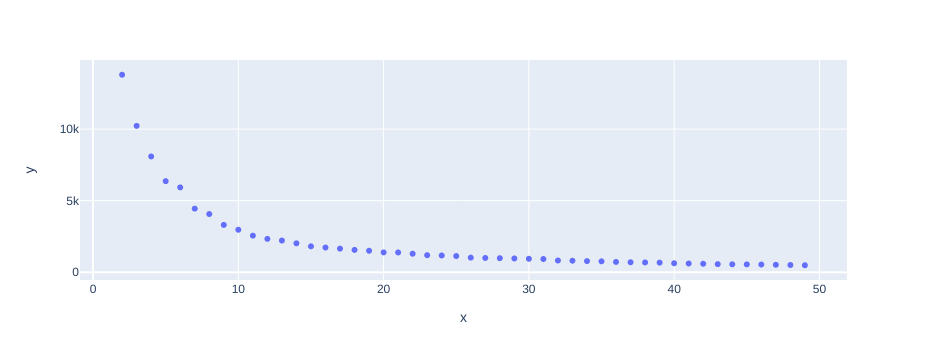

In [8]:
res = list()
n_cluster = range(2,50)

for n in n_cluster:
    kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto").fit(data)
    res.append(np.average(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)))

fig = px.scatter(x=n_cluster, y=res)
fig.show()

In [23]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(data)

In [24]:
labels = pd.DataFrame(kmeans.labels_) 
labeled_data = pd.concat((data,labels),axis=1)
labeled_data = labeled_data.rename({0:'labels'},axis=1)

In [25]:
labeled_data

,used_label,price,exteriorColor,interiorColor,drivetrain,minMPG,maxMPG,fuelType,transmission,engine,mileage,brand,labels
0,1,39,139,10,4,19.0,27.0,3,18,60,29403.0,28,1
1,1,49,145,10,3,19.0,24.0,3,2,62,32929.0,10,1
2,1,41,62,10,3,15.0,21.0,3,18,89,23173.0,25,1
3,1,28,66,82,4,29.0,35.0,3,25,4,10598.0,13,3
4,1,49,53,9,4,20.0,27.0,3,18,60,28137.0,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1,33,46,10,3,18.0,25.0,3,18,66,43807.0,16,5
400,0,30,163,56,1,34.0,30.0,5,25,28,41944.0,28,5
401,1,35,11,10,1,22.0,29.0,3,21,14,49386.0,5,5
402,1,35,168,48,3,16.0,22.0,3,8,86,115795.0,6,0


/home/proton/anaconda3/envs/proton/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



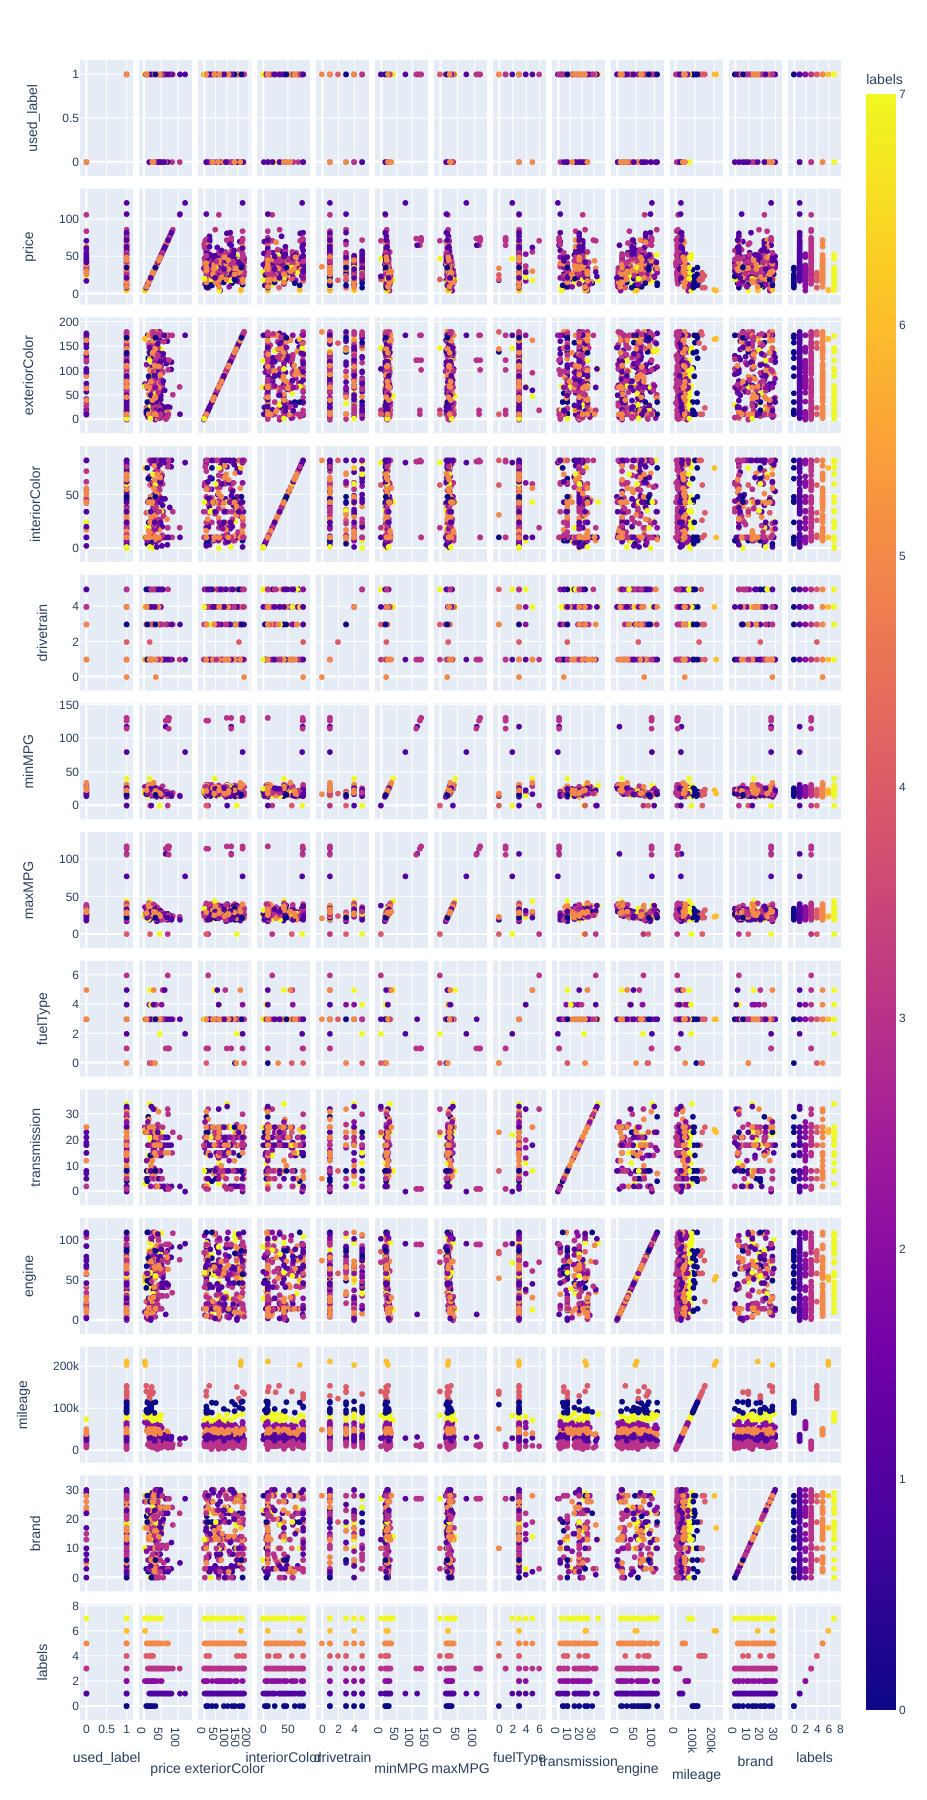

In [26]:
fig = px.scatter_matrix(labeled_data,color='labels')
fig.update_layout(
    width=1800,
    height=1800,
    hovermode='closest',
)
fig.show()